1. Chirag Mandal (229958)
2. Budhaditya Mukhopadhyay (229960)
 

#Importing Packages

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sn
import pandas as pd
from sklearn.metrics import confusion_matrix, plot_confusion_matrix
import random

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
os.chdir('/content/drive/My Drive/Colab Notebooks/Deep Learning Assignments/cifar_attempts.zip (Unzipped Files)')
os.getcwd()


Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


'/content/drive/My Drive/Colab Notebooks/Deep Learning Assignments/cifar_attempts.zip (Unzipped Files)'

# Pre-processing and Model Declaration


In [ ]:
def data_preprocess(data):
  train_imgs = data['train_imgs']
  train_lbls = data['train_lbls']
  val_imgs = data['val_imgs']
  val_lbls = data['val_lbls']
  test_imgs = data['test_imgs']
  test_lbls = data['test_lbls']
  train_lbls = train_lbls.astype("int32")
  test_lbls = test_lbls.astype("int32")
  val_lbls = val_lbls.astype("int32")
  return  train_imgs, test_imgs, val_imgs, train_lbls, test_lbls, val_lbls

In [ ]:
def model_def():
  model = models.Sequential()
  model.add(layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(32, 32, 3)))
  model.add(layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
  model.add(layers.MaxPooling2D((2, 2)))
  model.add(layers.Dropout(0.2))
  model.add(layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
  model.add(layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
  model.add(layers.MaxPooling2D((2, 2)))
  model.add(layers.Dropout(0.2))
  model.add(layers.Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
  model.add(layers.Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
  model.add(layers.MaxPooling2D((2, 2)))
  model.add(layers.Dropout(0.2))
  model.add(layers.Flatten())
  model.add(layers.Dense(128, activation='relu', kernel_initializer='he_uniform'))
  model.add(layers.Dropout(0.2))
  model.add(layers.Dense(10, activation='softmax'))
  model.summary()
  return model

# Dataset 1

In [ ]:
model1 = model_def()
model1.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
train_imgs, test_imgs, val_imgs, train_lbls, test_lbls, val_lbls = data_preprocess(np.load('data1.npz'))
model1.fit(train_imgs,train_lbls,epochs=10)


Model: "sequential_27"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_162 (Conv2D)          (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_163 (Conv2D)          (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d_81 (MaxPooling (None, 16, 16, 32)        0         
_________________________________________________________________
dropout_108 (Dropout)        (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_164 (Conv2D)          (None, 16, 16, 64)        18496     
_________________________________________________________________
conv2d_165 (Conv2D)          (None, 16, 16, 64)        36928     
_________________________________________________________________
max_pooling2d_82 (MaxPooling (None, 8, 8, 64)        

In [ ]:
val_loss, val_accuracy = model1.evaluate(val_imgs, val_lbls)

125/125 [==============================] - 0s 3ms/step - loss: 0.5012 - accuracy: 0.8343


In [ ]:
test_loss, test_accuracy = model1.evaluate(test_imgs, test_lbls)

313/313 [==============================] - 1s 3ms/step - loss: 6.4514 - accuracy: 0.6603


Printing train images for class :2


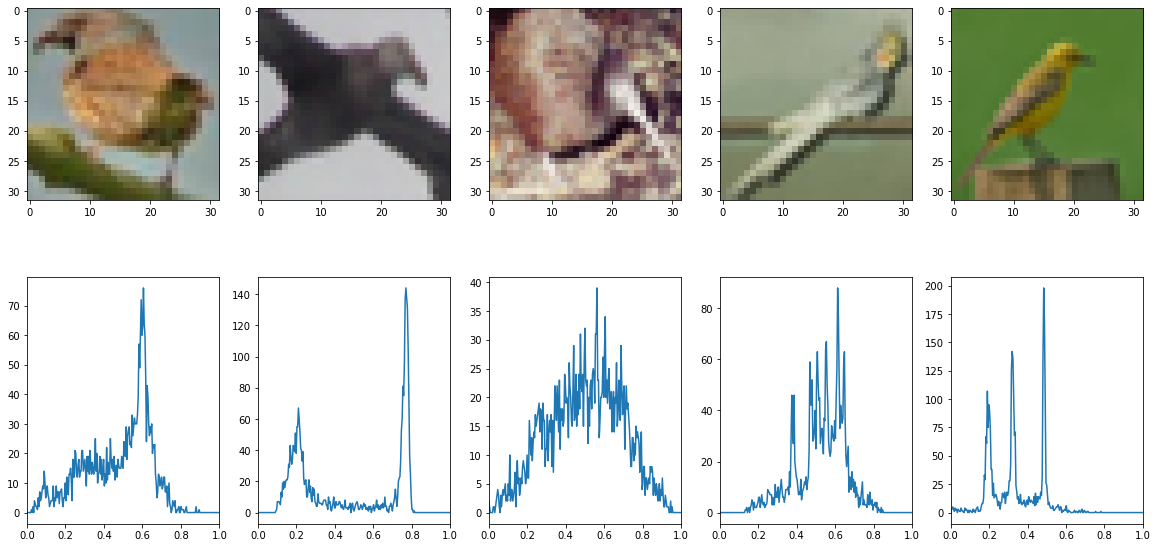

Printing test images for class :2


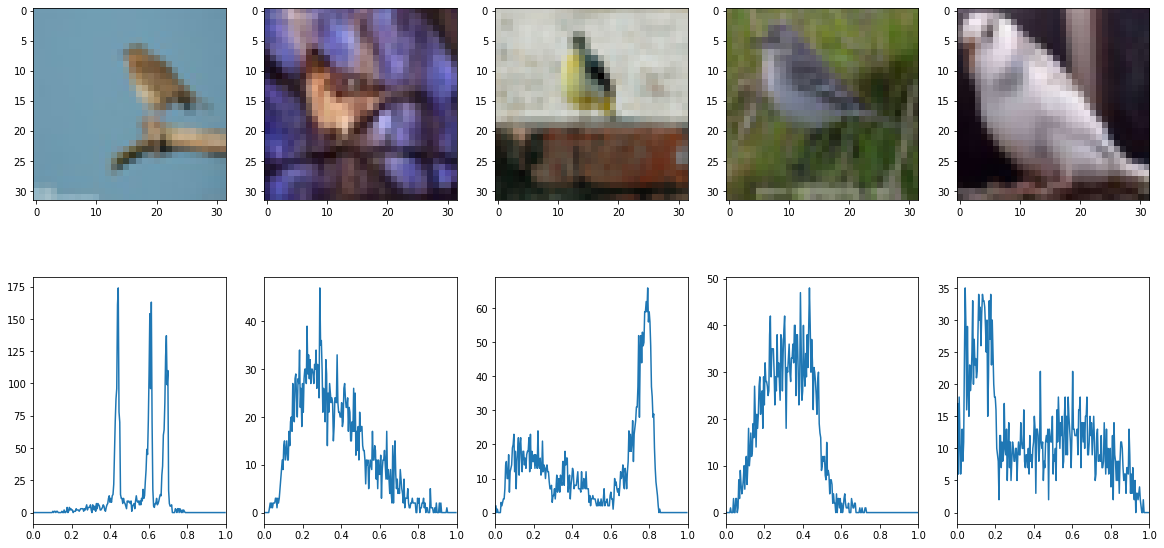

Printing train images for class :3


IndexError: ignored

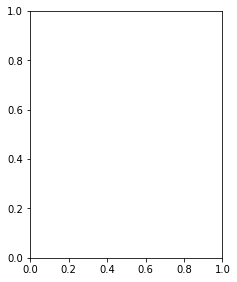

In [ ]:
for lbl in [2,3,4,5]:
  print("Printing train images for class :" +str(lbl))
  position = np.where(train_lbls==lbl)[0]
  plt.figure(figsize=(20,10))
  for i in range(5):
    plt.subplot(2,5, i+1)
    pos = random.choice(position)
    plt.imshow(train_imgs[pos])
    plt.subplot(2,5, i+6)
    plt.xlim([0.0, 1.0])
    histogram, bin_edges = np.histogram(train_imgs[pos], bins=256, range=(0, 1))
    plt.plot(bin_edges[0:-1], histogram) 
  plt.show()
  print("Printing test images for class :" +str(lbl))
  position = np.where(test_lbls==lbl)[0]
  plt.figure(figsize=(20,10))
  for i in range(5):
    plt.subplot(2,5, i+1)
    pos = random.choice(position)
    plt.imshow(test_imgs[pos])
    plt.subplot(2,5, i+6)
    plt.xlim([0.0, 1.0])
    histogram, bin_edges = np.histogram(test_imgs[pos], bins=256, range=(0, 1))
    plt.plot(bin_edges[0:-1], histogram)
  plt.show()

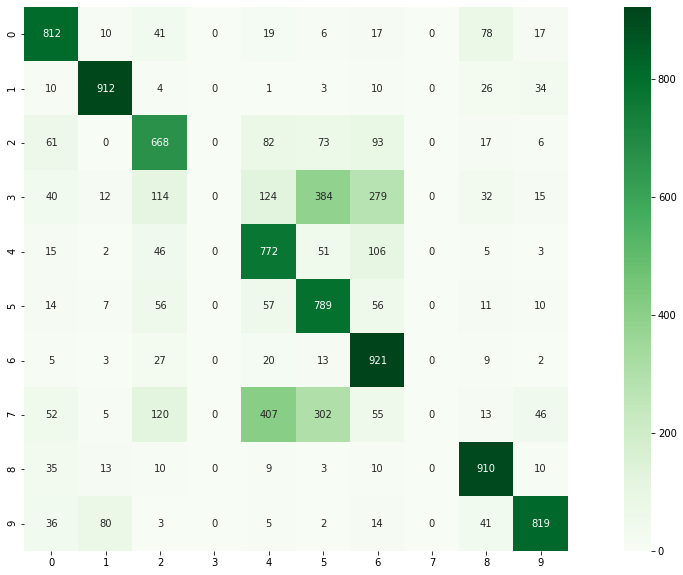

In [ ]:
y_pred = np.argmax(model1.predict(test_imgs), axis=-1)
cm = confusion_matrix(test_lbls, y_pred)
df_cm = pd.DataFrame(cm, range(10), range(10))
plt.figure(figsize = (20,10))
sn.heatmap(df_cm, annot=True, vmin=0,square=True,cmap='Greens', fmt='g')

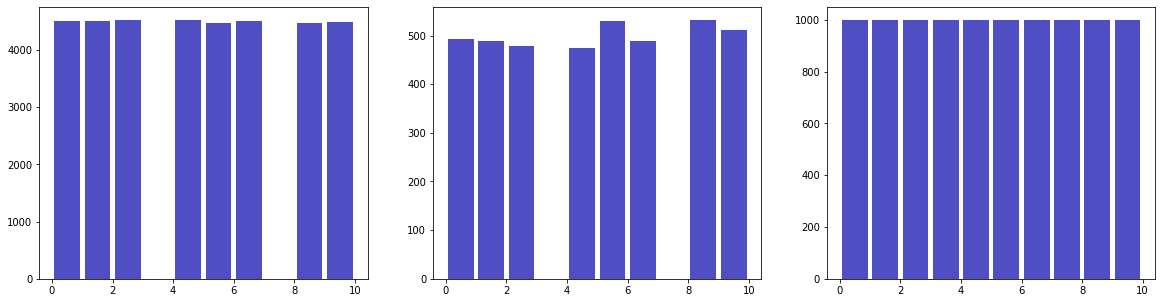

In [ ]:
plt.figure(figsize=(20,5))
plt.xticks([i for i in range(10)],[i for i in range(10)])
plt.subplot(1,3,1)
plt.hist(x=train_lbls, bins=[0,1,2,3,4,5,6,7,8,9, 10], color='#0504aa',rwidth=0.85,alpha=0.7)
plt.subplot(1,3,2)
plt.hist(x=val_lbls, bins=[0,1,2,3,4,5,6,7,8,9, 10], color='#0504aa',rwidth=0.85,alpha=0.7)
plt.subplot(1,3,3)
plt.hist(x=test_lbls, bins=[0,1,2,3,4,5,6,7,8,9, 10], color='#0504aa',rwidth=0.85,alpha=0.7)
plt.show()

Observations for Dataset 1:

 Training and validation images of class 3 and class 7 are missing. Hence, the accuracy of test data is getting hampered as images of class 3 and class 7 are not getting detected.



# Dataset 2

In [ ]:
model2 = model_def()
model2.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
train_imgs, test_imgs, val_imgs, train_lbls, test_lbls, val_lbls = data_preprocess(np.load('data2.npz'))
model2.fit(train_imgs,train_lbls,epochs=10)

Model: "sequential_28"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_168 (Conv2D)          (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_169 (Conv2D)          (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d_84 (MaxPooling (None, 16, 16, 32)        0         
_________________________________________________________________
dropout_112 (Dropout)        (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_170 (Conv2D)          (None, 16, 16, 64)        18496     
_________________________________________________________________
conv2d_171 (Conv2D)          (None, 16, 16, 64)        36928     
_________________________________________________________________
max_pooling2d_85 (MaxPooling (None, 8, 8, 64)        

In [ ]:
val_loss, val_accuracy = model2.evaluate(val_imgs, val_lbls)

157/157 [==============================] - 0s 2ms/step - loss: 0.4167 - accuracy: 0.8532


In [ ]:
test_loss, test_accuracy = model2.evaluate(test_imgs, test_lbls)

313/313 [==============================] - 1s 3ms/step - loss: 0.6426 - accuracy: 0.7816


Printing train images for class :2


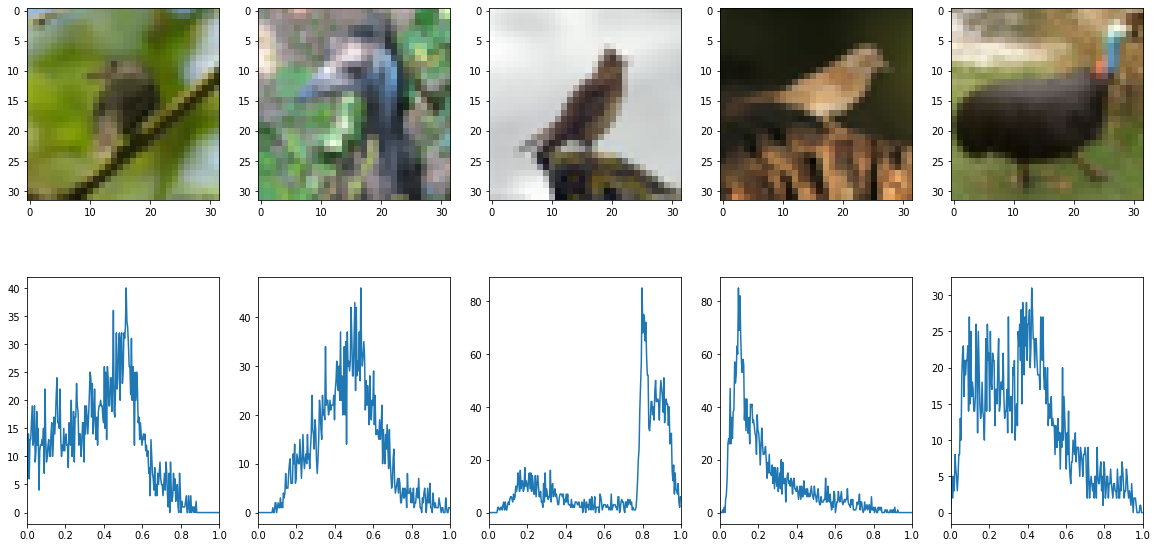

Printing validation images for class :2


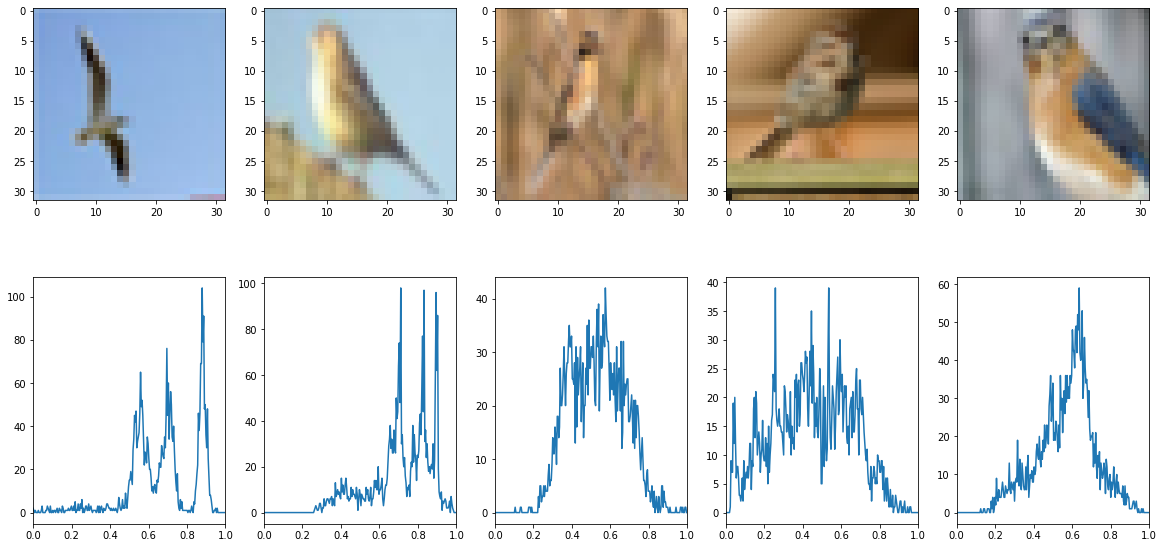

Printing train images for class :3


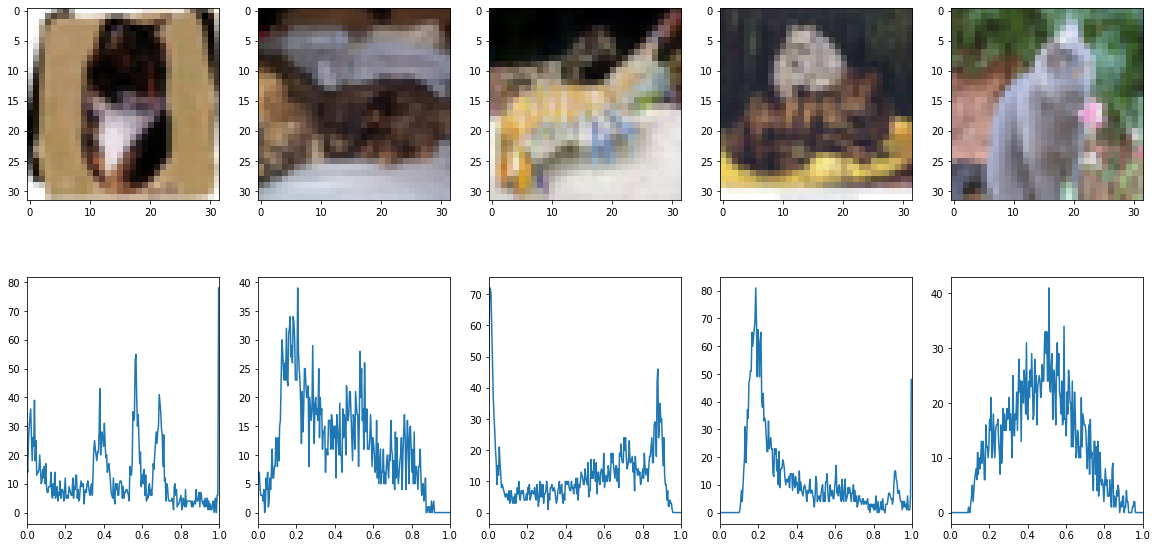

Printing validation images for class :3


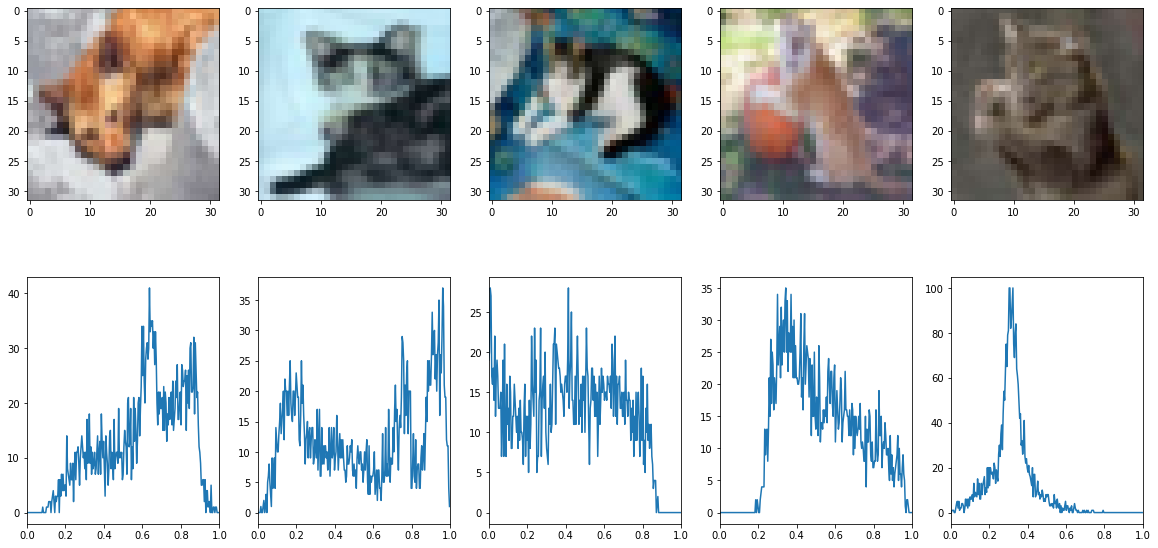

Printing train images for class :4


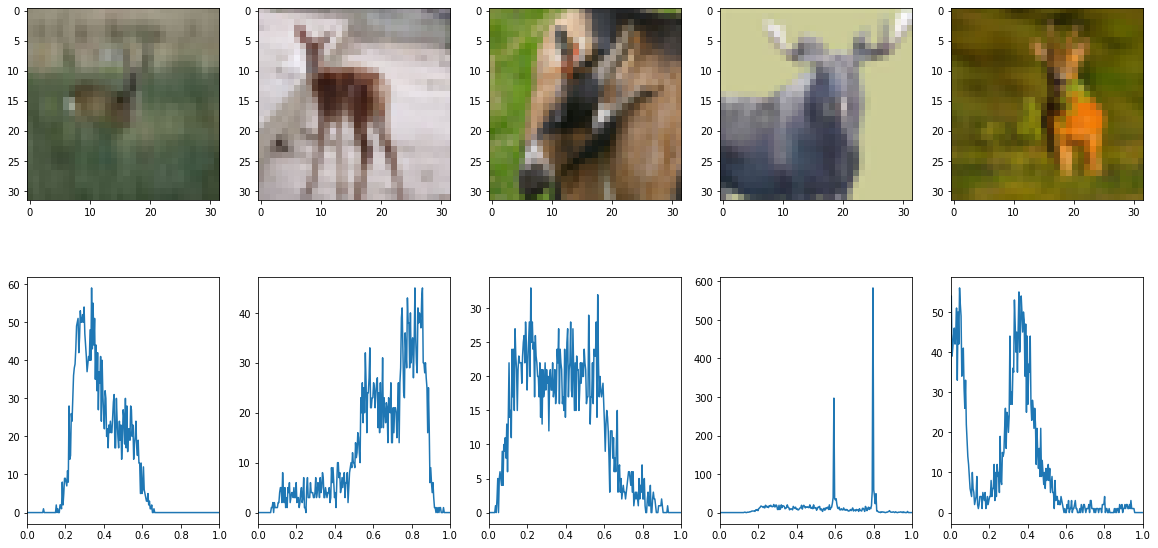

Printing validation images for class :4


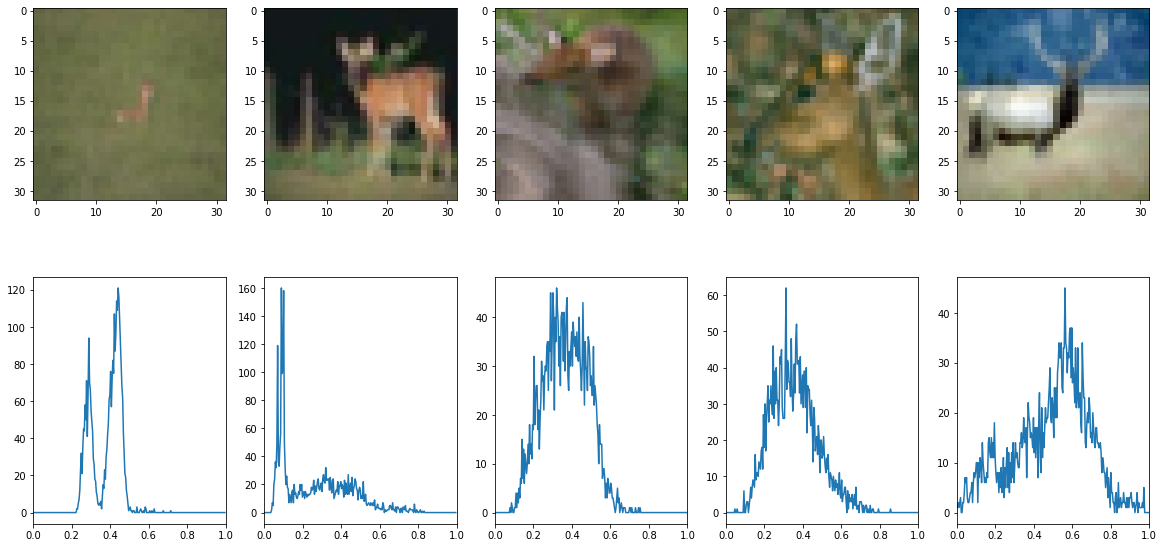

Printing train images for class :5


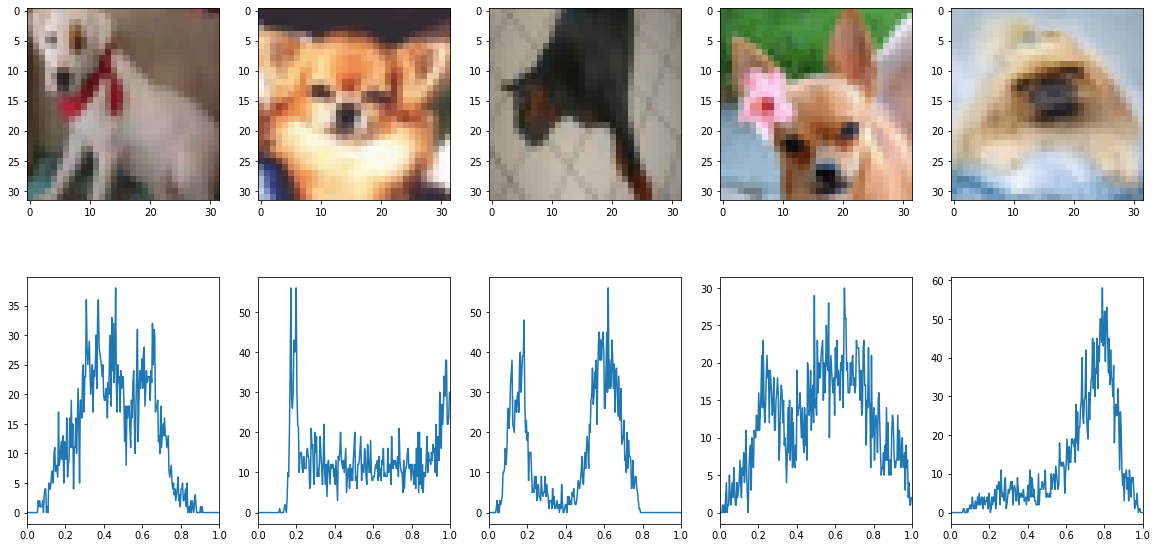

Printing validation images for class :5


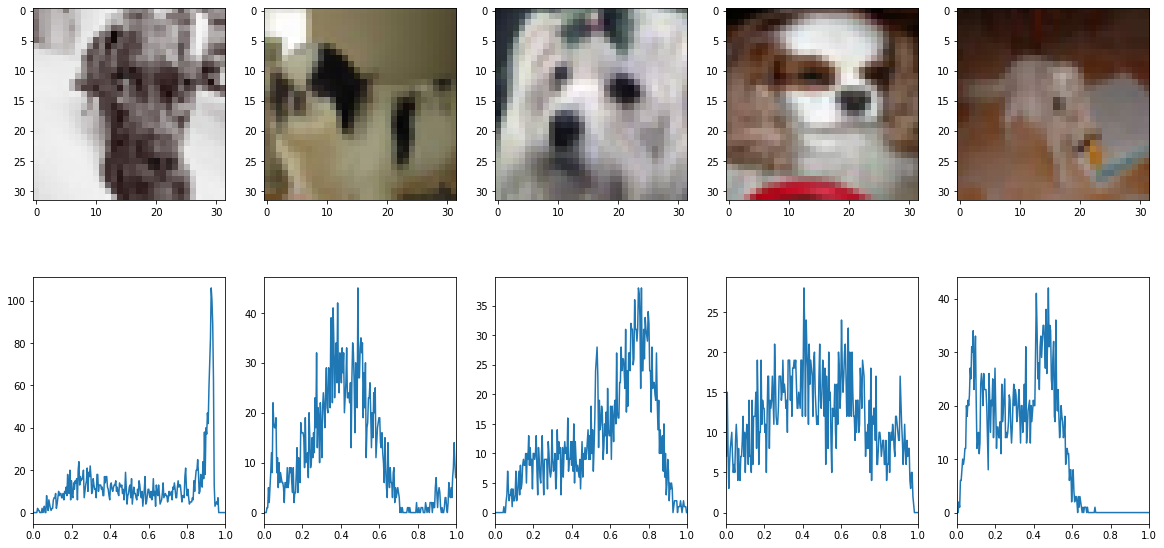

In [ ]:
for lbl in [2,3,4,5]:
  print("Printing train images for class :" +str(lbl))
  position = np.where(train_lbls==lbl)[0]
  plt.figure(figsize=(20,10))
  for i in range(5):
    plt.subplot(2,5, i+1)
    pos = random.choice(position)
    plt.imshow(train_imgs[pos])
    plt.subplot(2,5, i+6)
    plt.xlim([0.0, 1.0])
    histogram, bin_edges = np.histogram(train_imgs[pos], bins=256, range=(0, 1))
    plt.plot(bin_edges[0:-1], histogram) 
  plt.show()
  print("Printing validation images for class :" +str(lbl))
  position = np.where(val_lbls==lbl)[0]
  plt.figure(figsize=(20,10))
  for i in range(5):
    plt.subplot(2,5, i+1)
    pos = random.choice(position)
    plt.imshow(val_imgs[pos])
    plt.subplot(2,5, i+6)
    plt.xlim([0.0, 1.0])
    histogram, bin_edges = np.histogram(val_imgs[pos], bins=256, range=(0, 1))
    plt.plot(bin_edges[0:-1], histogram)
  plt.show()

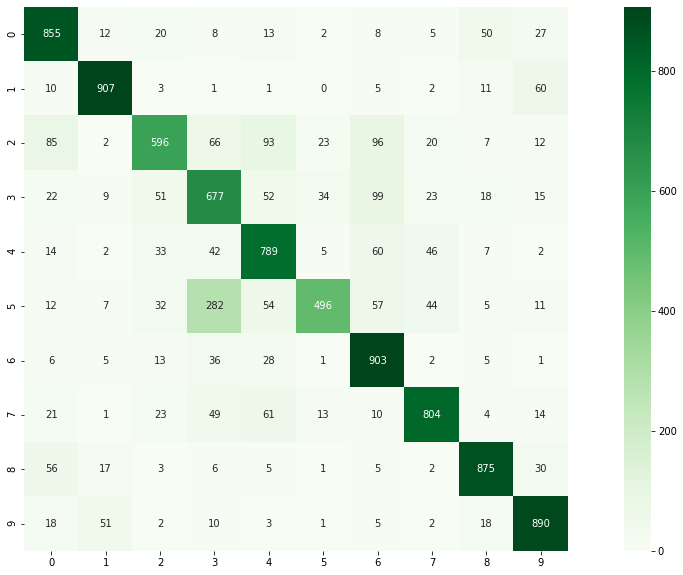

In [ ]:
y_pred = np.argmax(model2.predict(test_imgs), axis=-1)
cm = confusion_matrix(test_lbls, y_pred)
df_cm = pd.DataFrame(cm, range(10), range(10))
plt.figure(figsize = (20,10))
sn.heatmap(df_cm, annot=True, vmin=0,square=True,cmap='Greens', fmt='g')

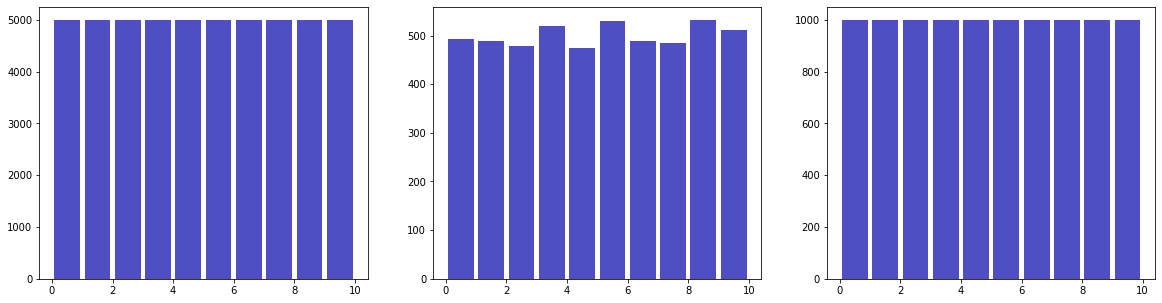

In [ ]:
plt.figure(figsize=(20,5))
plt.xticks([i for i in range(10)],[i for i in range(10)])
plt.subplot(1,3,1)
plt.hist(x=train_lbls, bins=[0,1,2,3,4,5,6,7,8,9, 10], color='#0504aa',rwidth=0.85,alpha=0.7)
plt.subplot(1,3,2)
plt.hist(x=val_lbls, bins=[0,1,2,3,4,5,6,7,8,9, 10], color='#0504aa',rwidth=0.85,alpha=0.7)
plt.subplot(1,3,3)
plt.hist(x=test_lbls, bins=[0,1,2,3,4,5,6,7,8,9, 10], color='#0504aa',rwidth=0.85,alpha=0.7)
plt.show()

Observations for Dataset 2:

Validation accuracy is more than training accuracy. If we observe the images, the images are of different types in the training and validation sets.

# Dataset 3

In [ ]:
model3 = model_def()
model3.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
train_imgs, test_imgs, val_imgs, train_lbls, test_lbls, val_lbls = data_preprocess(np.load('data3.npz'))
model3.fit(train_imgs,train_lbls,epochs=10)

Model: "sequential_29"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_174 (Conv2D)          (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_175 (Conv2D)          (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d_87 (MaxPooling (None, 16, 16, 32)        0         
_________________________________________________________________
dropout_116 (Dropout)        (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_176 (Conv2D)          (None, 16, 16, 64)        18496     
_________________________________________________________________
conv2d_177 (Conv2D)          (None, 16, 16, 64)        36928     
_________________________________________________________________
max_pooling2d_88 (MaxPooling (None, 8, 8, 64)        

In [ ]:
val_loss, val_accuracy = model3.evaluate(val_imgs, val_lbls)

157/157 [==============================] - 0s 3ms/step - loss: 0.6365 - accuracy: 0.7900


In [ ]:
test_loss, test_accuracy = model3.evaluate(test_imgs, test_lbls)

313/313 [==============================] - 1s 3ms/step - loss: 5.1945 - accuracy: 0.2790


Printing train images for class :2


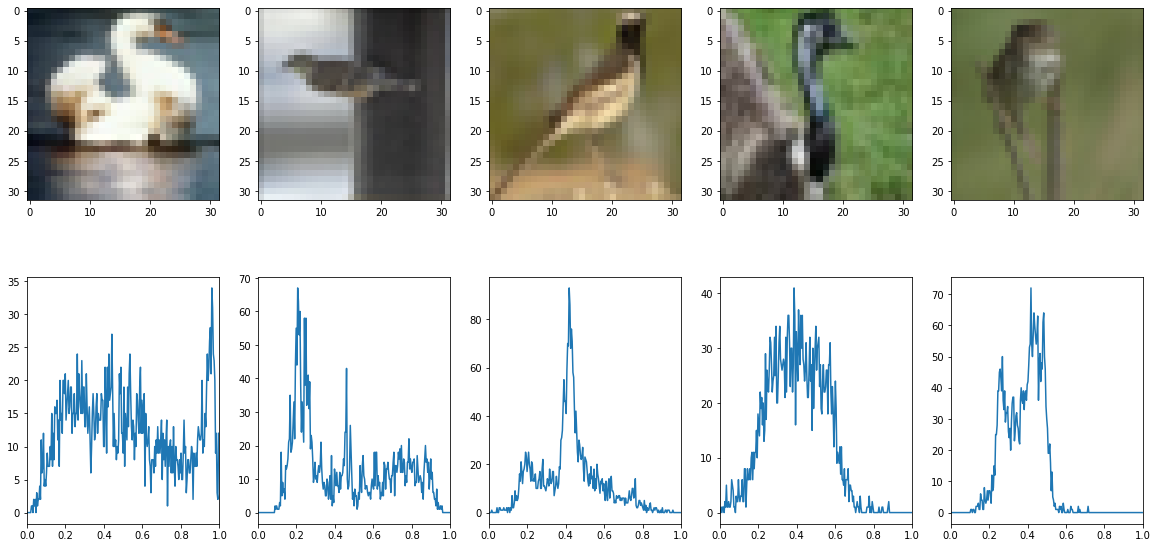

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Printing test images for class :2


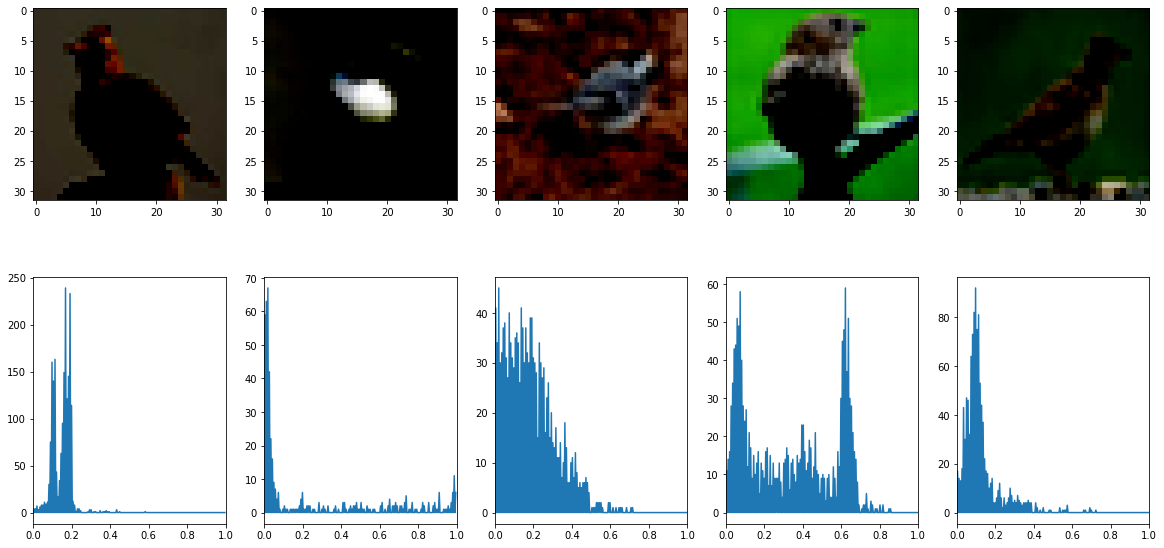

Printing train images for class :3


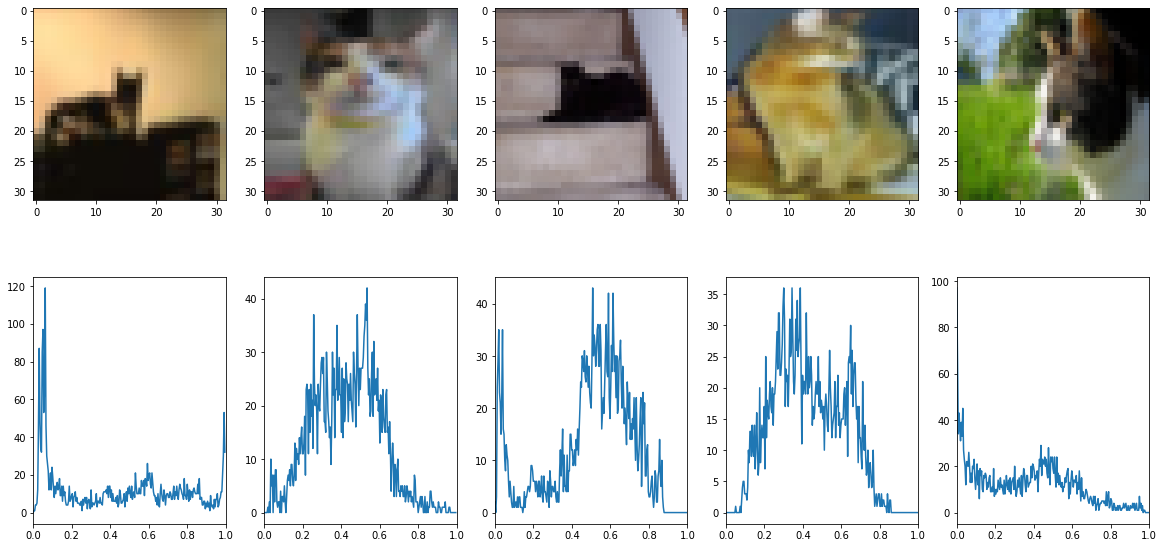

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Printing test images for class :3


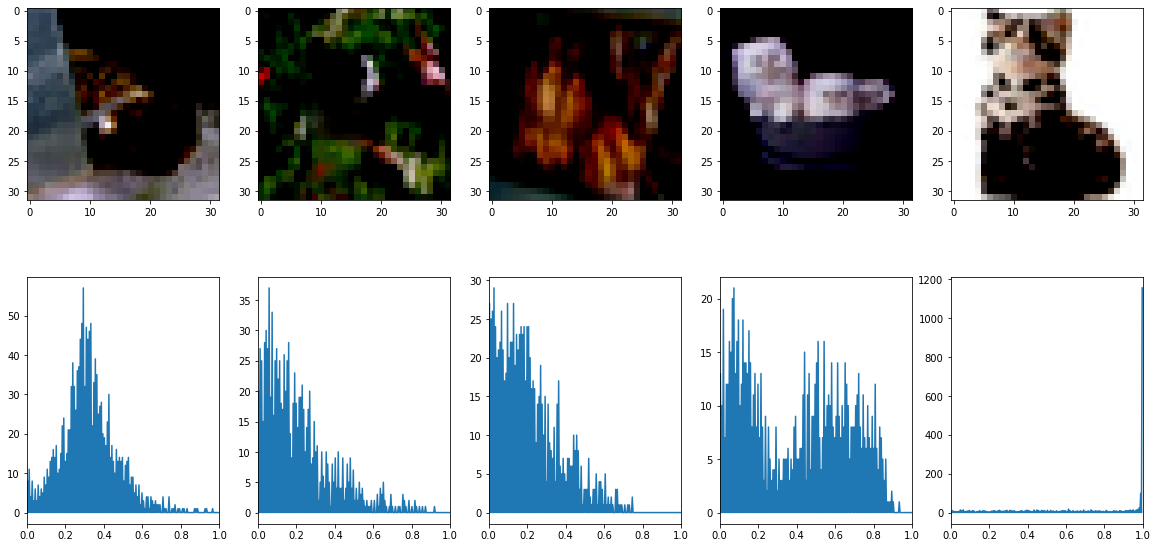

Printing train images for class :4


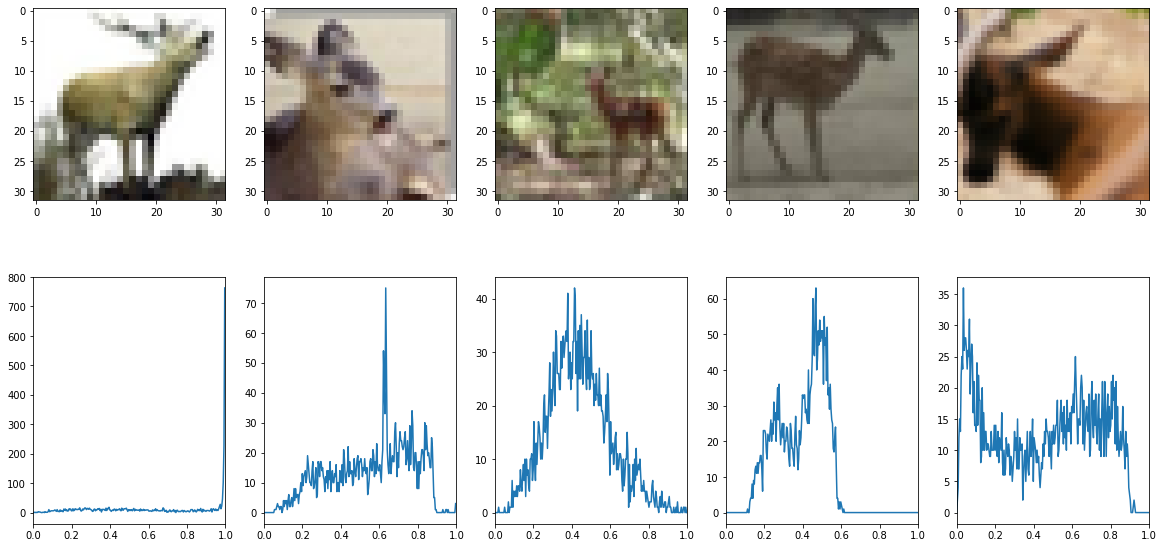

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Printing test images for class :4


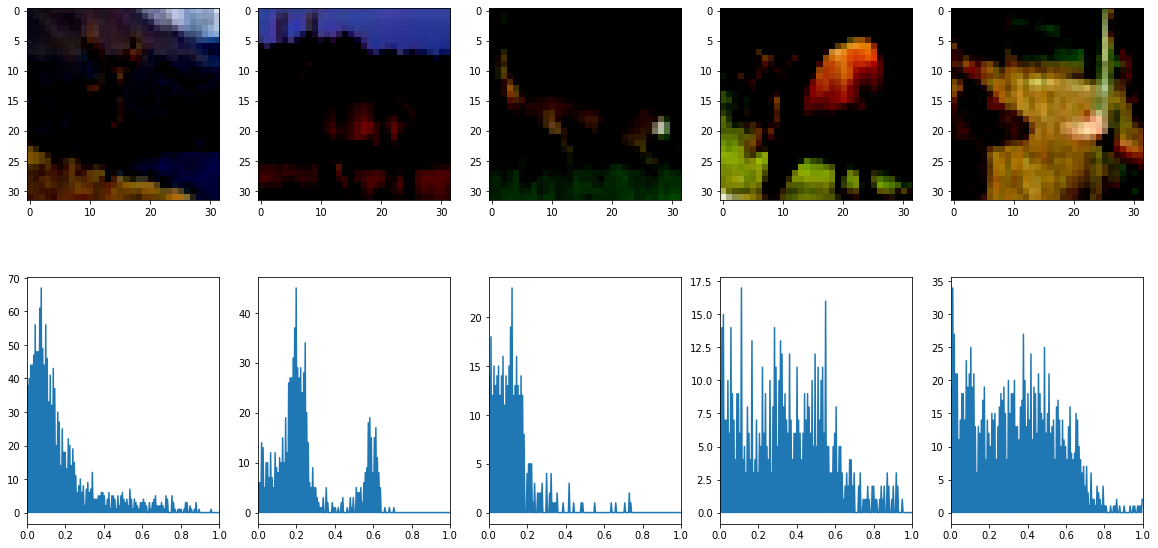

Printing train images for class :5


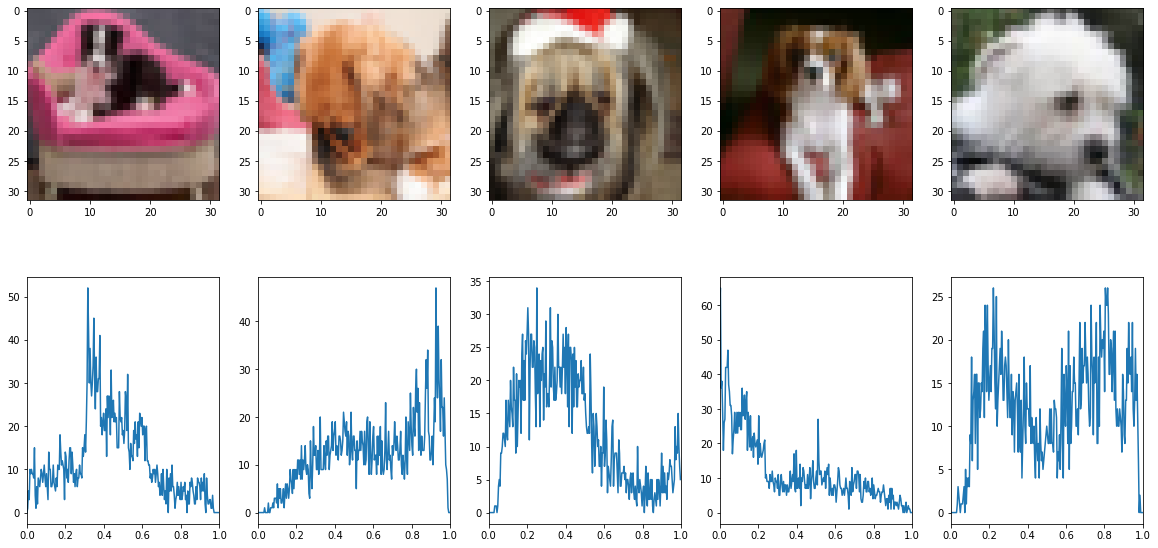

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Printing test images for class :5


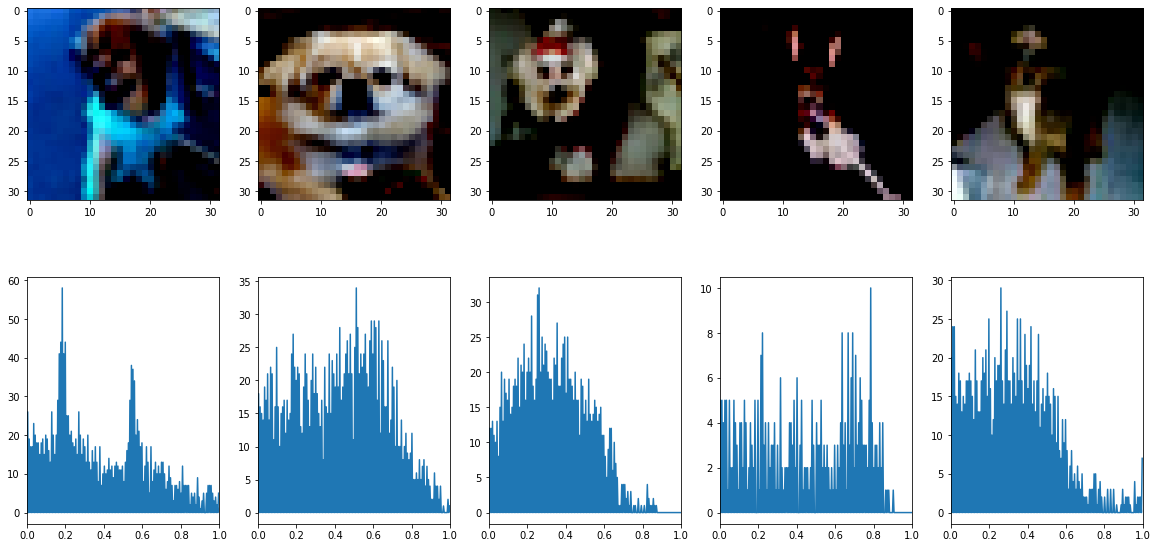

In [ ]:
for lbl in [2,3,4,5]:
  print("Printing train images for class :" +str(lbl))
  position = np.where(train_lbls==lbl)[0]
  plt.figure(figsize=(20,10))
  for i in range(5):
    plt.subplot(2,5, i+1)
    pos = random.choice(position)
    plt.imshow(train_imgs[pos])
    plt.subplot(2,5, i+6)
    plt.xlim([0.0, 1.0])
    histogram, bin_edges = np.histogram(train_imgs[pos], bins=256, range=(0, 1))
    plt.plot(bin_edges[0:-1], histogram) 
  plt.show()
  print("Printing test images for class :" +str(lbl))
  position = np.where(test_lbls==lbl)[0]
  plt.figure(figsize=(20,10))
  for i in range(5):
    plt.subplot(2,5, i+1)
    pos = random.choice(position)
    plt.imshow(test_imgs[pos])
    plt.subplot(2,5, i+6)
    plt.xlim([0.0, 1.0])
    histogram, bin_edges = np.histogram(test_imgs[pos], bins=256, range=(0, 1))
    plt.plot(bin_edges[0:-1], histogram)
  plt.show()

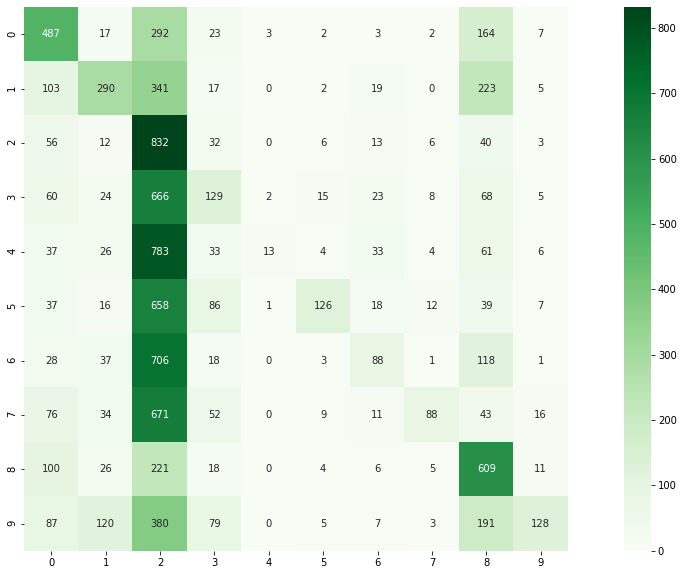

In [ ]:
y_pred = np.argmax(model3.predict(test_imgs), axis=-1)
cm = confusion_matrix(test_lbls, y_pred)
df_cm = pd.DataFrame(cm, range(10), range(10))
plt.figure(figsize = (20,10))
sn.heatmap(df_cm, annot=True, vmin=0,square=True,cmap='Greens', fmt='g')

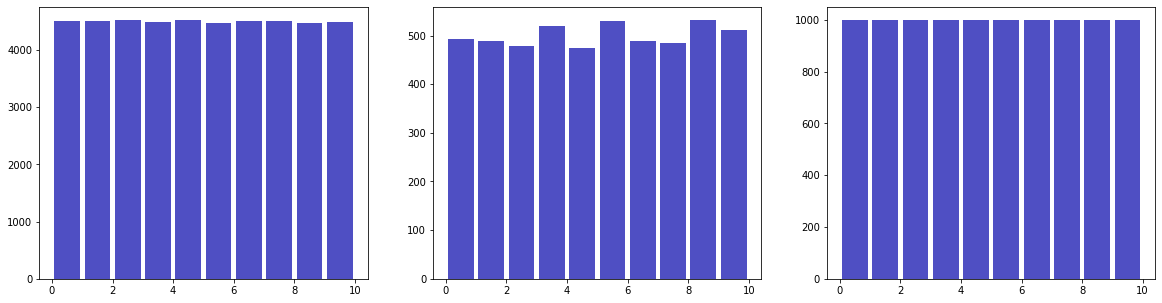

In [ ]:
plt.figure(figsize=(20,5))
plt.xticks([i for i in range(10)],[i for i in range(10)])
plt.subplot(1,3,1)
plt.hist(x=train_lbls, bins=[0,1,2,3,4,5,6,7,8,9, 10], color='#0504aa',rwidth=0.85,alpha=0.7)
plt.subplot(1,3,2)
plt.hist(x=val_lbls, bins=[0,1,2,3,4,5,6,7,8,9, 10], color='#0504aa',rwidth=0.85,alpha=0.7)
plt.subplot(1,3,3)
plt.hist(x=test_lbls, bins=[0,1,2,3,4,5,6,7,8,9, 10], color='#0504aa',rwidth=0.85,alpha=0.7)
plt.show()

Observations for Dataset 3:

The test images are negative images. A negative is referred to an image with reversed brightness, i.e., the lightest parts appear the darkest and the darkest parts appear lightest.

Also the confusion matrix, show that the test images are labelled as class 2 images for most classes.

# Dataset 4

In [ ]:
model4 = model_def()
model4.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
train_imgs, test_imgs, val_imgs, train_lbls, test_lbls, val_lbls = data_preprocess(np.load('data4.npz'))
model4.fit(train_imgs,train_lbls,epochs=10)

Model: "sequential_31"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_186 (Conv2D)          (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_187 (Conv2D)          (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d_93 (MaxPooling (None, 16, 16, 32)        0         
_________________________________________________________________
dropout_124 (Dropout)        (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_188 (Conv2D)          (None, 16, 16, 64)        18496     
_________________________________________________________________
conv2d_189 (Conv2D)          (None, 16, 16, 64)        36928     
_________________________________________________________________
max_pooling2d_94 (MaxPooling (None, 8, 8, 64)        

In [ ]:
val_loss, val_accuracy = model4.evaluate(val_imgs, val_lbls)

157/157 [==============================] - 0s 3ms/step - loss: 0.0000e+00 - accuracy: 1.0000


In [ ]:
test_loss, test_accuracy = model4.evaluate(test_imgs, test_lbls)

313/313 [==============================] - 1s 3ms/step - loss: 119.1175 - accuracy: 0.1110


Printing train images for class :2


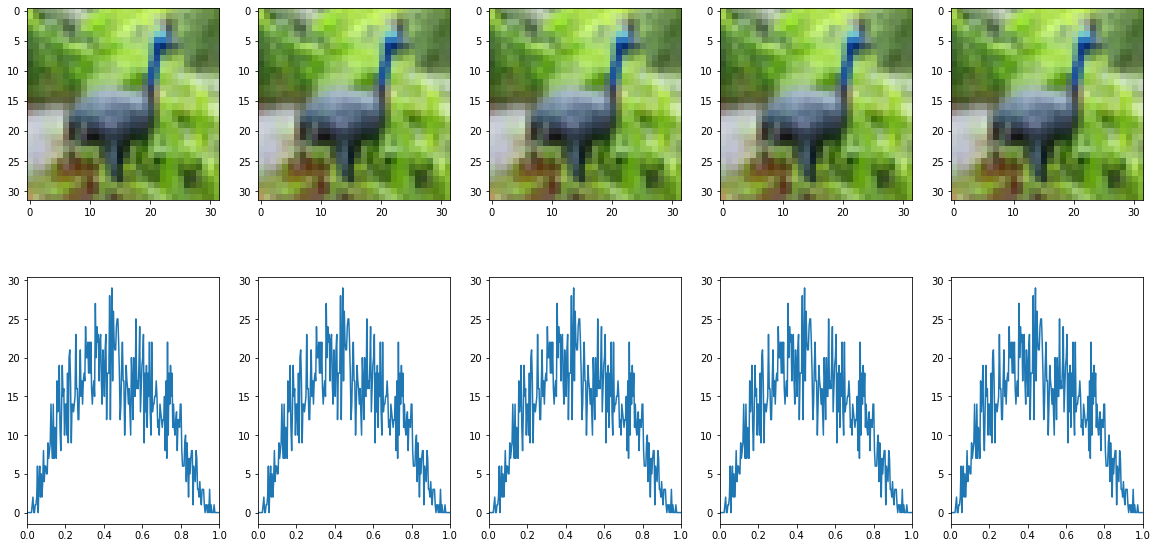

Printing validation images for class :2


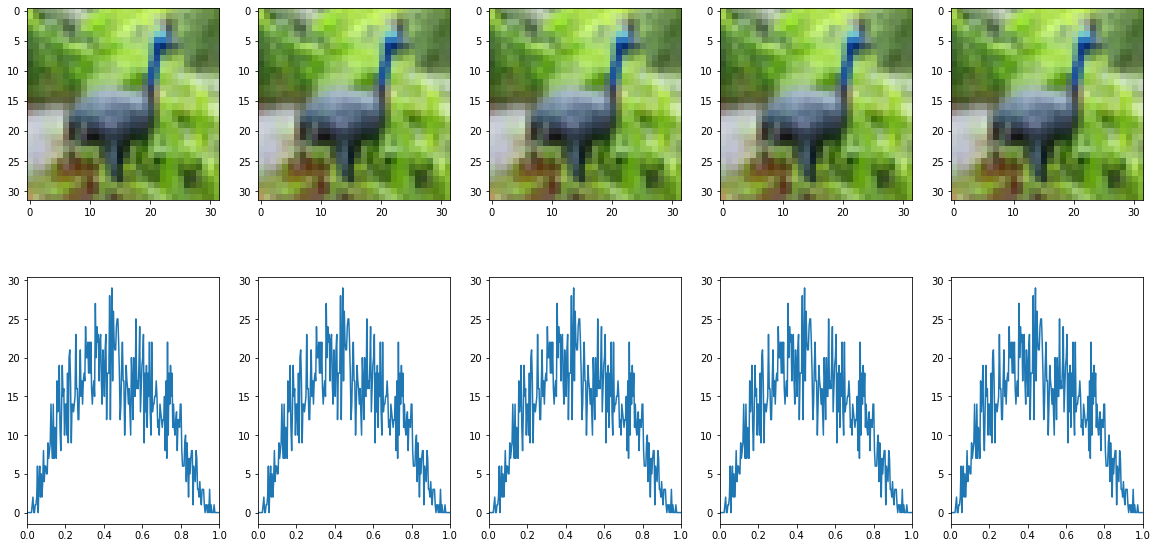

Printing test images for class :2


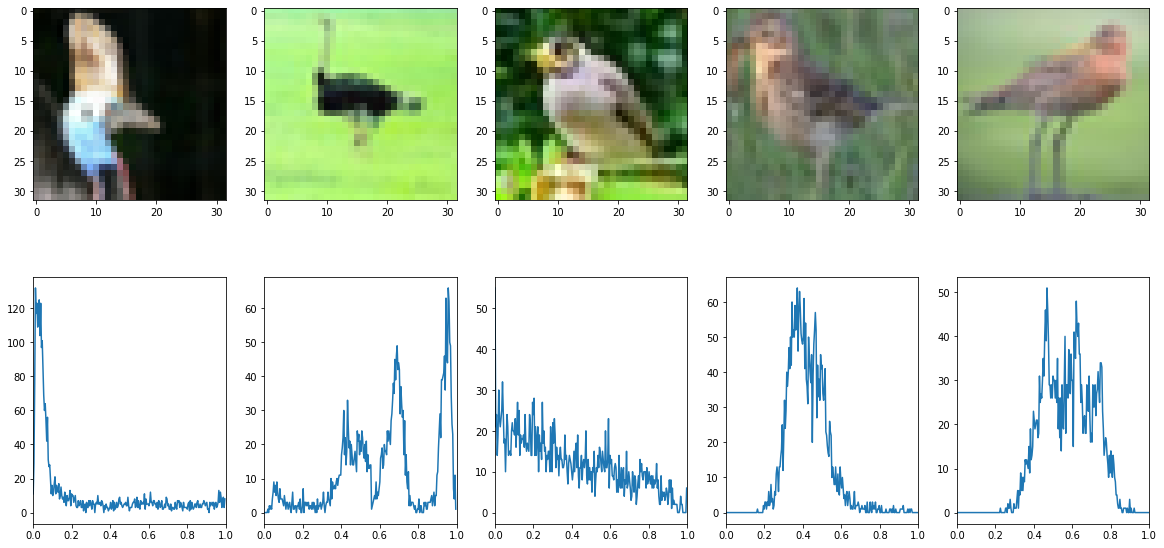

Printing train images for class :3


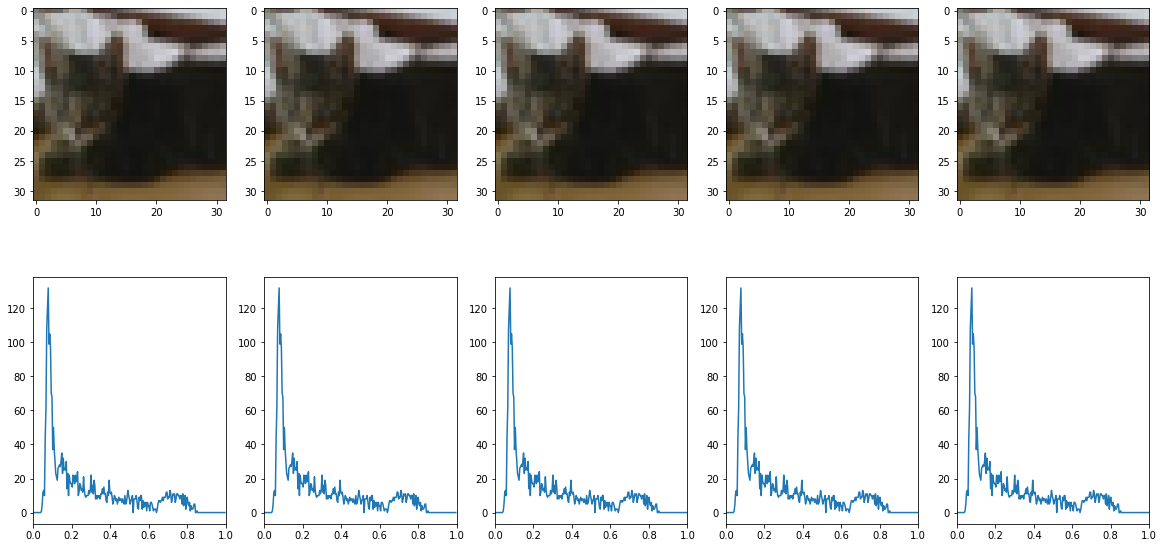

Printing validation images for class :3


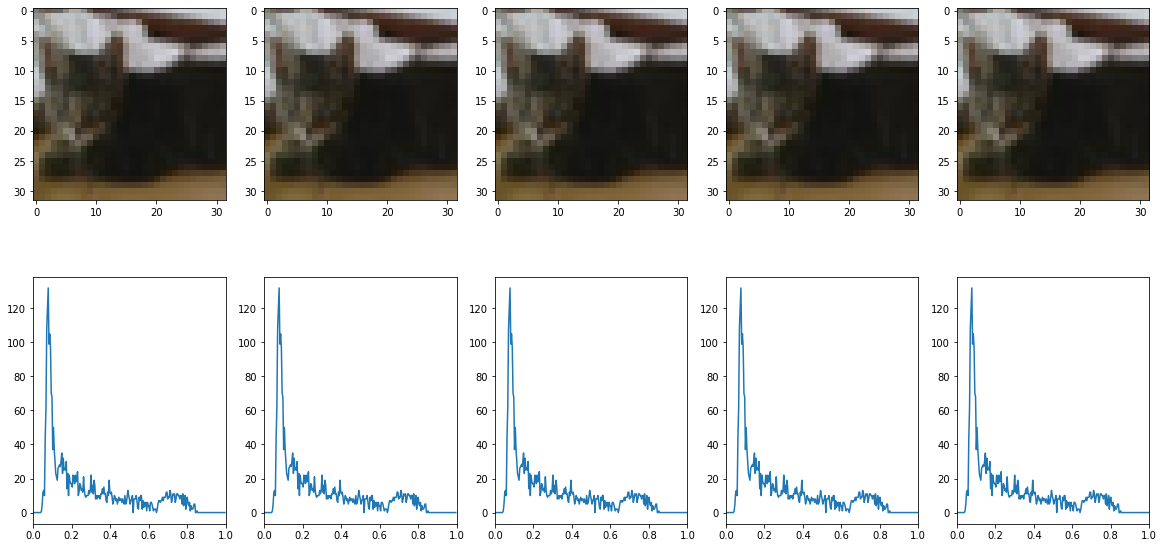

Printing test images for class :3


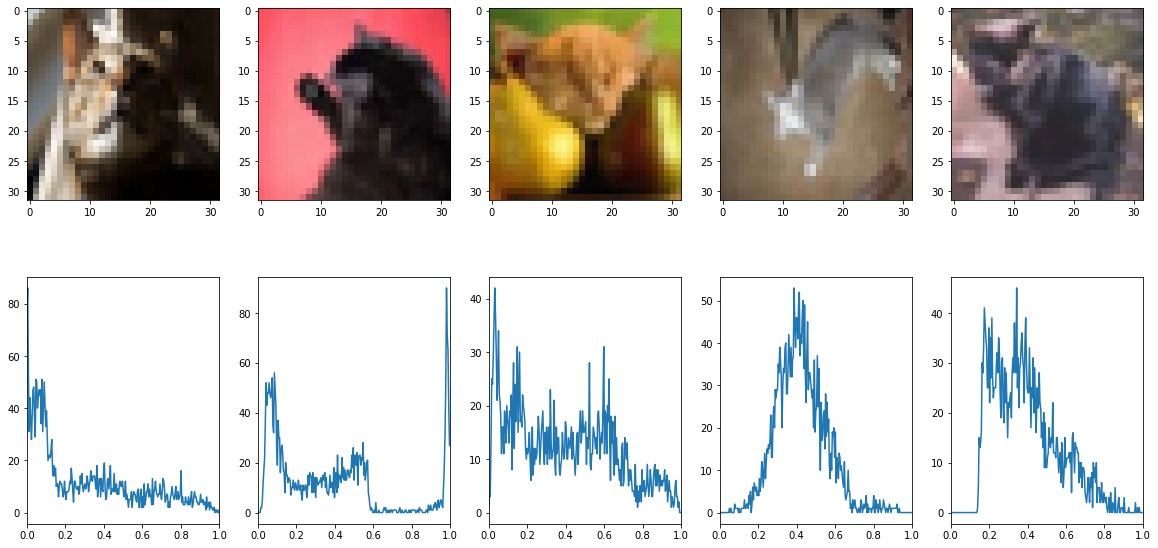

Printing train images for class :4


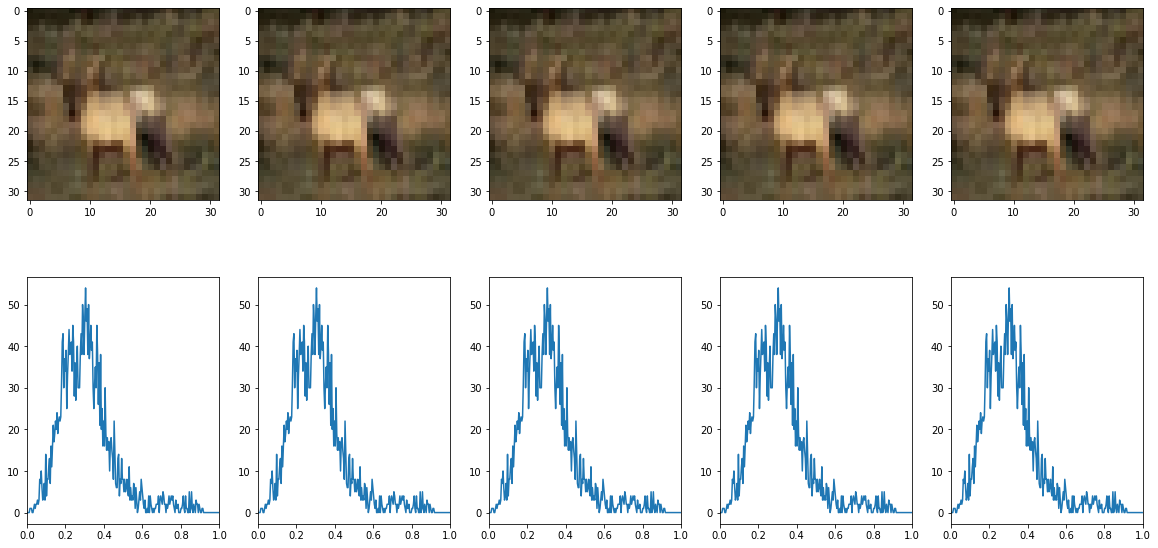

Printing validation images for class :4


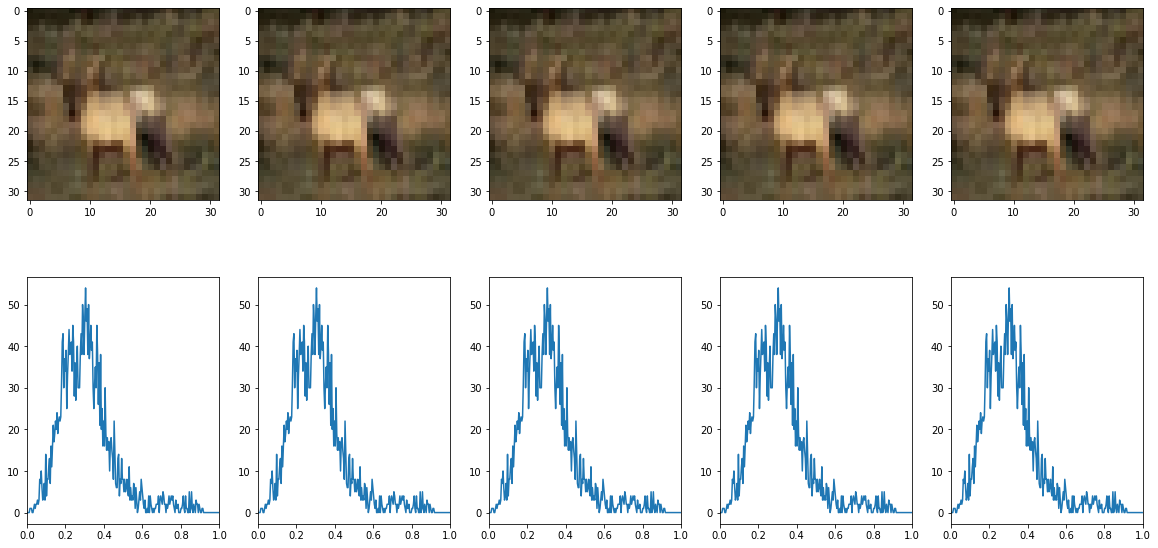

Printing test images for class :4


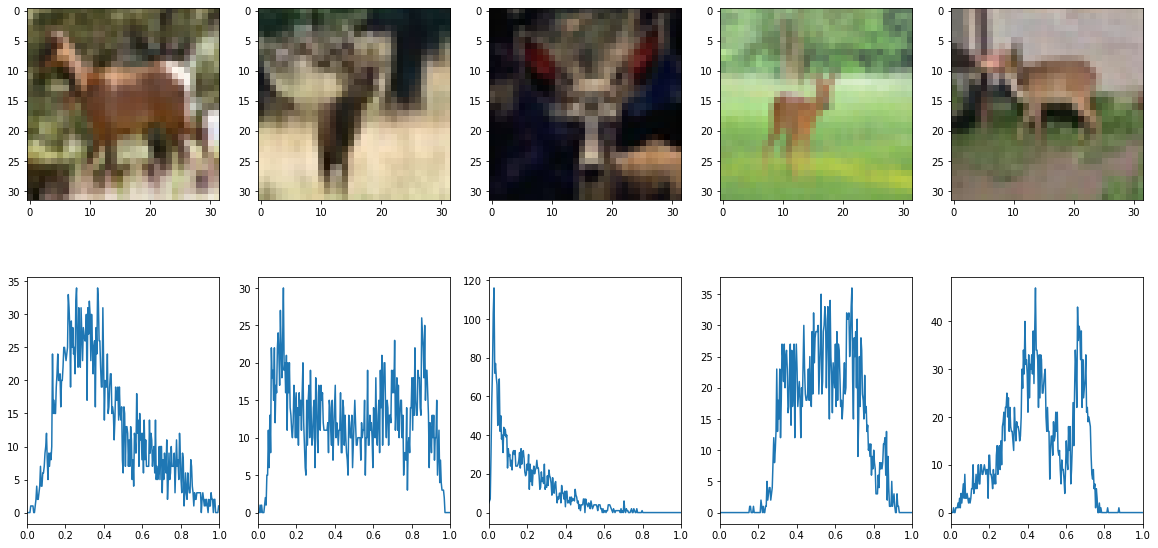

Printing train images for class :5


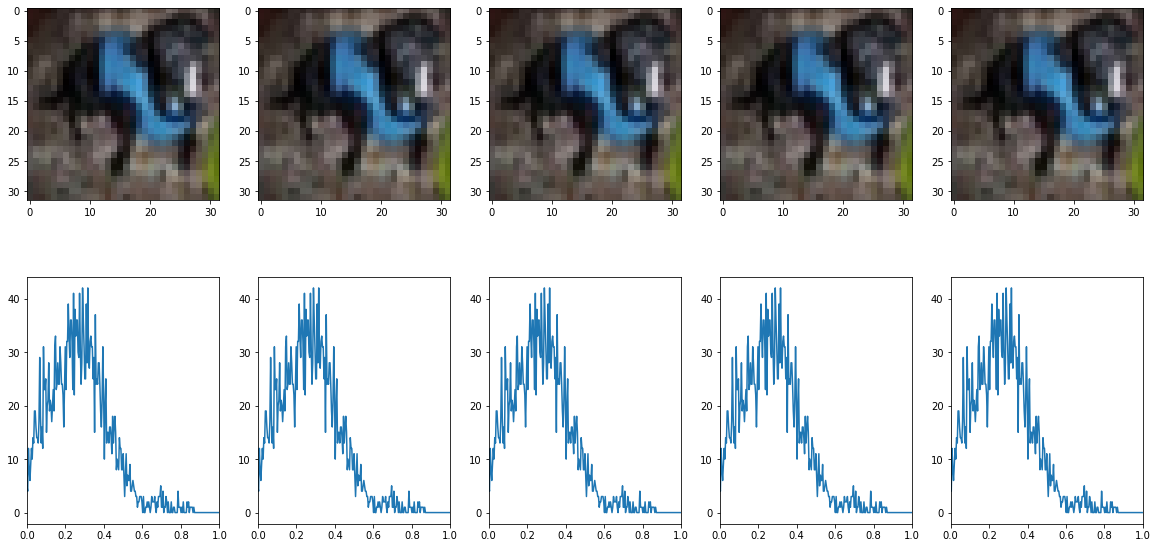

Printing validation images for class :5


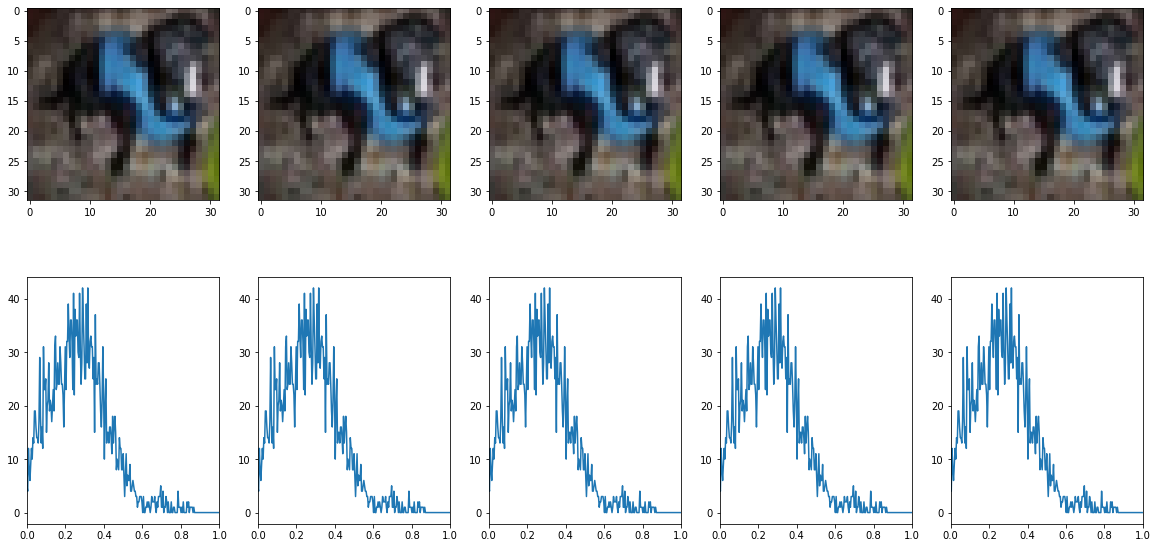

Printing test images for class :5


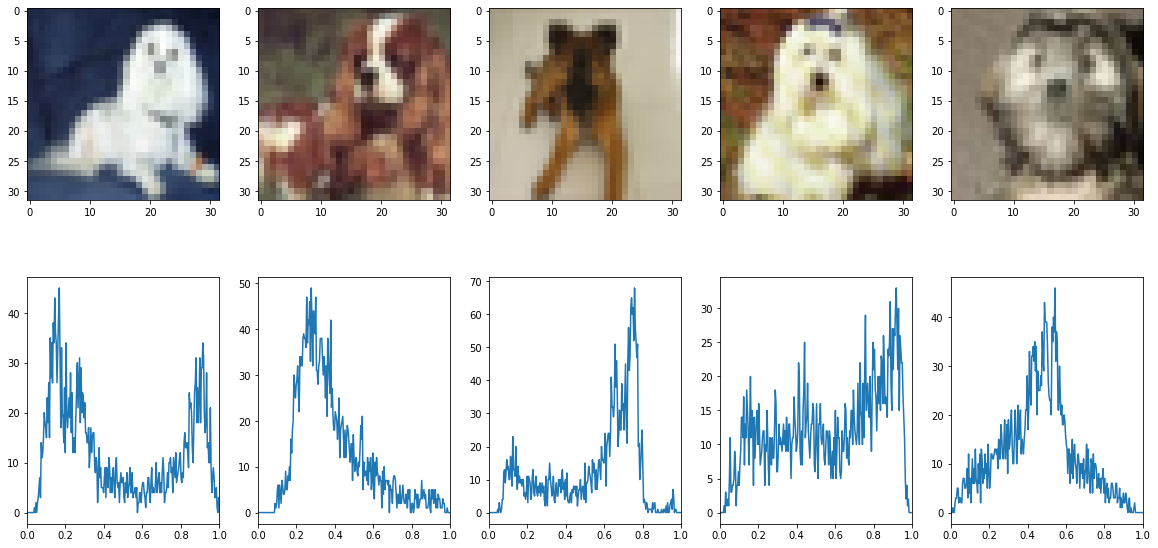

In [ ]:
for lbl in [2,3,4,5]:
  print("Printing train images for class :" +str(lbl))
  position = np.where(train_lbls==lbl)[0]
  plt.figure(figsize=(20,10))
  for i in range(5):
    plt.subplot(2,5, i+1)
    pos = random.choice(position)
    plt.imshow(train_imgs[pos])
    plt.subplot(2,5, i+6)
    plt.xlim([0.0, 1.0])
    histogram, bin_edges = np.histogram(train_imgs[pos], bins=256, range=(0, 1))
    plt.plot(bin_edges[0:-1], histogram) 
  plt.show()
  print("Printing validation images for class :" +str(lbl))
  position = np.where(val_lbls==lbl)[0]
  plt.figure(figsize=(20,10))
  for i in range(5):
    plt.subplot(2,5, i+1)
    pos = random.choice(position)
    plt.imshow(val_imgs[pos])
    plt.subplot(2,5, i+6)
    plt.xlim([0.0, 1.0])
    histogram, bin_edges = np.histogram(val_imgs[pos], bins=256, range=(0, 1))
    plt.plot(bin_edges[0:-1], histogram)
  plt.show()
  print("Printing test images for class :" +str(lbl))
  position = np.where(test_lbls==lbl)[0]
  plt.figure(figsize=(20,10))
  for i in range(5):
    plt.subplot(2,5, i+1)
    pos = random.choice(position)
    plt.imshow(test_imgs[pos])
    plt.subplot(2,5, i+6)
    plt.xlim([0.0, 1.0])
    histogram, bin_edges = np.histogram(test_imgs[pos], bins=256, range=(0, 1))
    plt.plot(bin_edges[0:-1], histogram)
  plt.show()

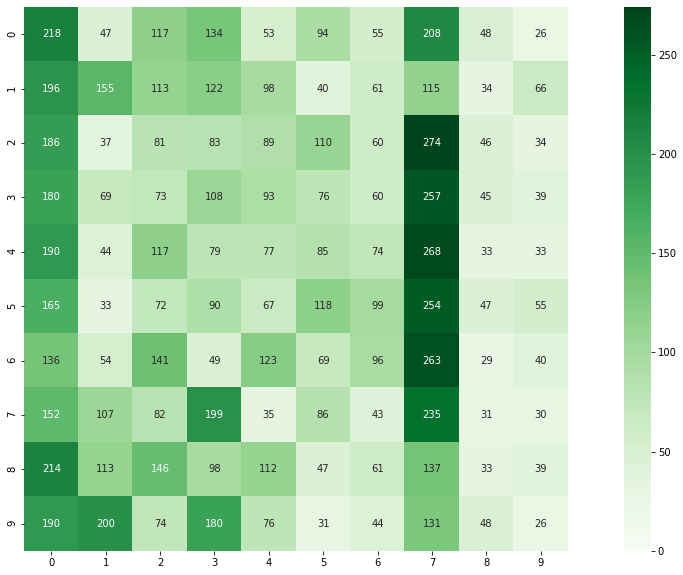

In [ ]:
y_pred = np.argmax(model4.predict(test_imgs), axis=-1)
cm = confusion_matrix(test_lbls, y_pred)
df_cm = pd.DataFrame(cm, range(10), range(10))
plt.figure(figsize = (20,10))
sn.heatmap(df_cm, annot=True, vmin=0,square=True,cmap='Greens', fmt='g')

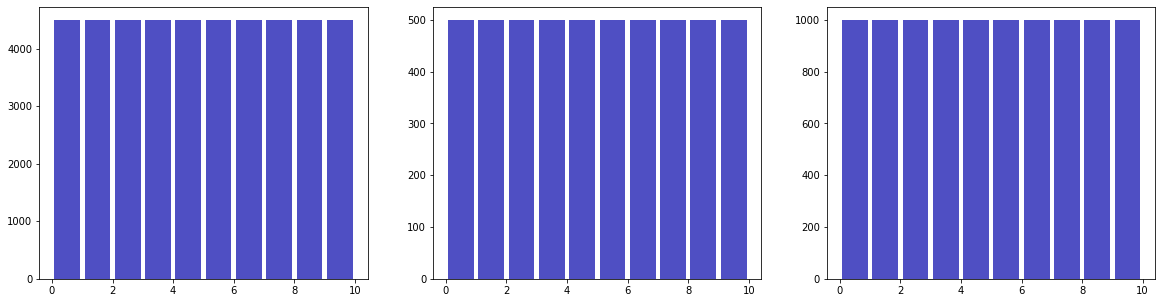

In [ ]:
plt.figure(figsize=(20,5))
plt.xticks([i for i in range(10)],[i for i in range(10)])
plt.subplot(1,3,1)
plt.hist(x=train_lbls, bins=[0,1,2,3,4,5,6,7,8,9, 10], color='#0504aa',rwidth=0.85,alpha=0.7)
plt.subplot(1,3,2)
plt.hist(x=val_lbls, bins=[0,1,2,3,4,5,6,7,8,9, 10], color='#0504aa',rwidth=0.85,alpha=0.7)
plt.subplot(1,3,3)
plt.hist(x=test_lbls, bins=[0,1,2,3,4,5,6,7,8,9, 10], color='#0504aa',rwidth=0.85,alpha=0.7)
plt.show()

Observation for Dataset 4:

The training and validation images are all same for respective classes. That is there is only one image for each class in training and validation set. Hence the test accuracy is so low.